In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
D1 = 1.0
D2 = 40.0
a = 0.1
b = 0.9
size = 100

T = 200.0
dt = 0.001
dx=(dt/0.005)**0.5
n = int(T / dt)

In [4]:
def laplacian1D(Z):
    Zleft = np.roll(Z, 1)
    Zright = np.roll(Z, -1)
    return (Zleft + Zright - 2 * Z)/(dx**2)


def laplacian2D(a, dx):
    return (
        - 4 * a
        + np.roll(a,1,axis=0) 
        + np.roll(a,-1,axis=0)
        + np.roll(a,+1,axis=1)
        + np.roll(a,-1,axis=1)
    ) / (dx ** 2)

In [11]:
U = np.random.rand(size)
V = np.random.rand(size)
# V = np.ones(size)
# U = np.zeros(size)

In [12]:
for i in range(n):
    deltaU = laplacian1D(U)
    deltaV = laplacian1D(V)
    
    Uc = U[:]
    Vc = V[:]
    
    U, V = \
      Uc + dt * (D1 * deltaU + a - Uc + Uc**2 * Vc), \
        Vc + dt * (D2 * deltaV + b - Uc**2 * Vc)
    
    


   

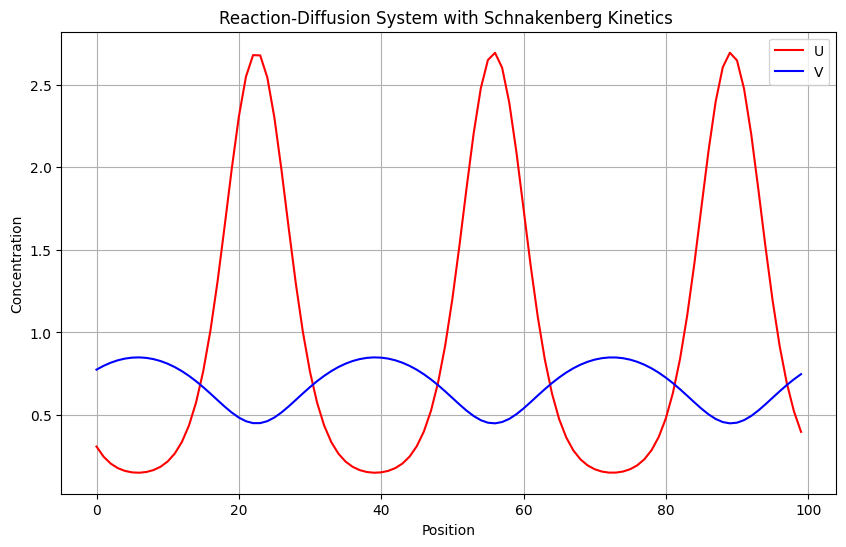

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(U, label='U',color='r')
plt.plot( V, label='V',color='b')
plt.xlabel('Position')
plt.ylabel('Concentration')
plt.title('Reaction-Diffusion System with Schnakenberg Kinetics ')
plt.legend()
plt.grid(True)
plt.show()